In [337]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [338]:
df=pd.read_csv("Salary_dataset.csv",index_col=0)
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 720.0 bytes


In [340]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [341]:
df.shape

(30, 2)

In [342]:
print(df.isna().sum())
print(df.duplicated().sum())

YearsExperience    0
Salary             0
dtype: int64
0


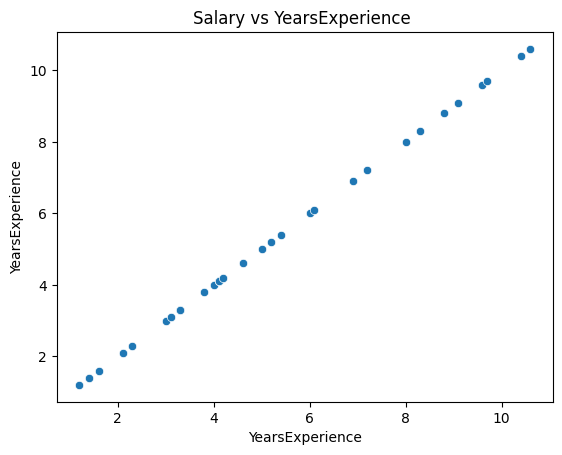

In [343]:
sns.scatterplot(
                    x = df['YearsExperience'],
                    y = df['YearsExperience'],
                    data = df
)
plt.title("Salary vs YearsExperience ")
plt.show()

We found out that there exist linear relation between the two variables so we will process withn LinearRegression on them .

In [344]:
print("The correlation matrix : ",df.corr(numeric_only=True))

The correlation matrix :                   YearsExperience    Salary
YearsExperience         1.000000  0.978242
Salary                  0.978242  1.000000


The correlation is strong so we can use this as one of the coeffecients (of course there is only one variable to begin with) and start applying Linear Regression.

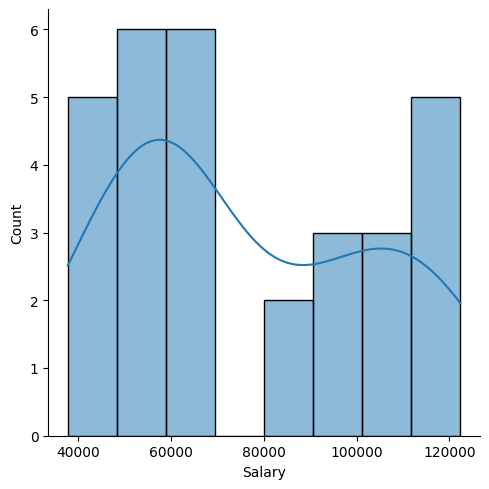

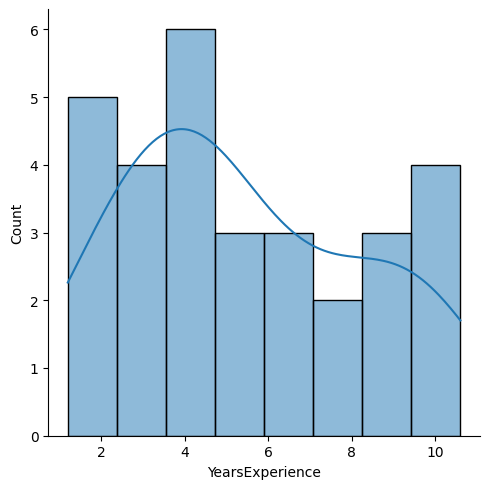

In [345]:
sns.displot(
                df['Salary'],
                bins=8,
                kde=True
)
sns.displot(
                df['YearsExperience'],
                bins = 8,
                kde=True
)

                        *** Here we have found one of the most important observation upon Salary displot ***

The salary displot as we can see is slightly skewed (more tilted on left with right tail) which is eventually gonna cause bias in model.
This is mainly because of the small dataset size and limitation of columns to choose for the linear model( If we had more columns we might have had found a better column that may hav had bell-shaped curve).
Also the YearsExperience is left skewed


In [346]:
X = df[['YearsExperience']]
y = df['Salary']

In [347]:
from sklearn.model_selection import train_test_split

In [348]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [349]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
# fit_intercept=True This makes sure we are not assuming y = 0 when x = 0 (Line doesnt cross from origin)

In [350]:
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [351]:
print("The coeffecient of the equation is :",model.coef_[0])
print("The intercept of the equation is :",model.intercept_)

The coeffecient of the equation is : 9423.81532303098
The intercept of the equation is : 24380.20147947369


In [352]:
y_predicted = model.predict(X_test)
y_predicted_all = model.predict(X)

In [353]:
y_predicted

array([115791.21011287,  71499.27809463, 102597.86866063,  75268.80422384,
        55478.79204548,  60190.69970699])

In [354]:
from sklearn.metrics import root_mean_squared_error,mean_absolute_error,mean_squared_error,r2_score
import math

In [355]:
print("The MAE is : ",mean_absolute_error(y_test,y_predicted))
print("The MSE is : ",mean_squared_error(y_test,y_predicted))
print("The RMSE is : ",math.sqrt(mean_squared_error(y_test,y_predicted))) #Or simply rmse which is simple
print("The R**2 score is : ",r2_score(y_test,y_predicted))
# model.score(X_test,y_test) #Same as R**2 score but just for Linear Models elsewhere means accuracy 

The MAE is :  6286.453830757745
The MSE is :  49830096.855908334
The RMSE is :  7059.043621901506
The R**2 score is :  0.9024461774180498


Key Takedowns : 
    The MAE tells us that for each prediction we are off by the mean of  6286.453830757745
    The RMSE penalizes the errors more heavily as we are squaring first then rooting . The RMSE value 7059.043621901506 here means we are quite off.
    The R**2 score explains that almost 90% of the variance in salary is explained by YearsExperience which is quite good.

In [356]:
residuals  = y_test - y_predicted

In [357]:
print("The residual mean is : ",residuals.mean())

The residual mean is :  3047.724525926345


The Residual mean was found to be huge but was expected due to skewed Salary displot .
This positive residual mean indicates that the salaries are higher than expected by average of :  3047.724525926345.

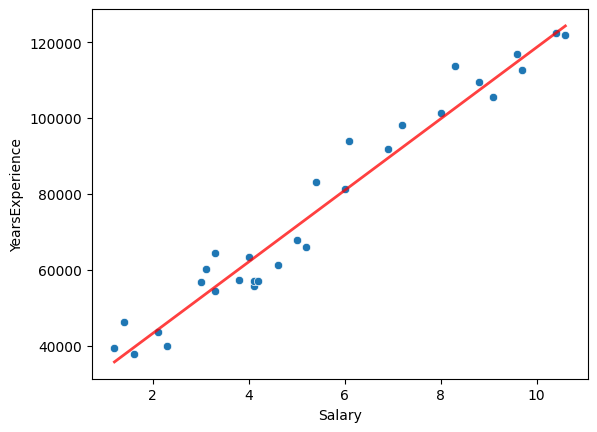

In [358]:
sns.scatterplot(
                    x = df['YearsExperience'],
                    y = df['Salary'],
                    data = df
)
plt.plot(
            df['YearsExperience'],
            y_predicted_all,
            color = 'red',
            linewidth = 2,
            alpha = 0.75,
)
plt.xlabel('Salary')
plt.ylabel('YearsExperience')
plt.show()

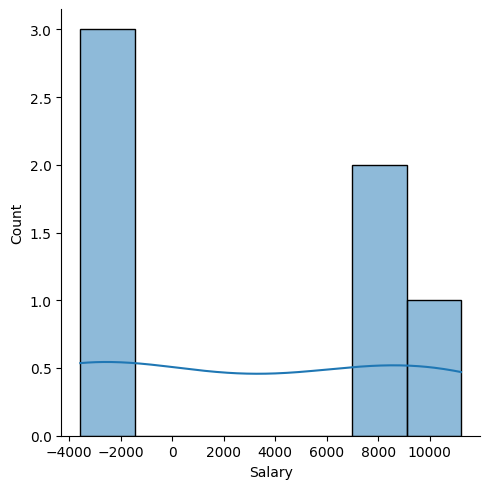

In [359]:
sns.displot(
                residuals,
                bins = 7,
                kde = True
)
plt.show()

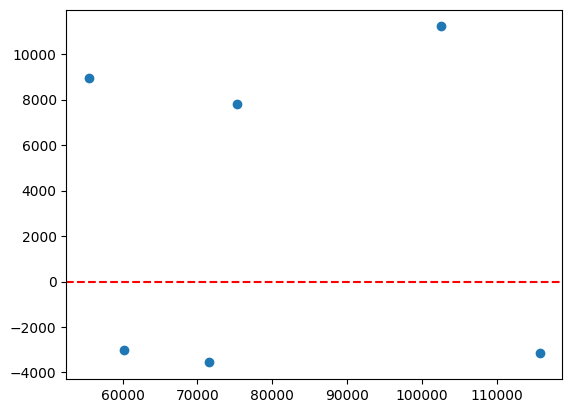

In [360]:
plt.scatter(y_predicted,residuals)
plt.axhline(0, color="red", linestyle="--")
plt.show()

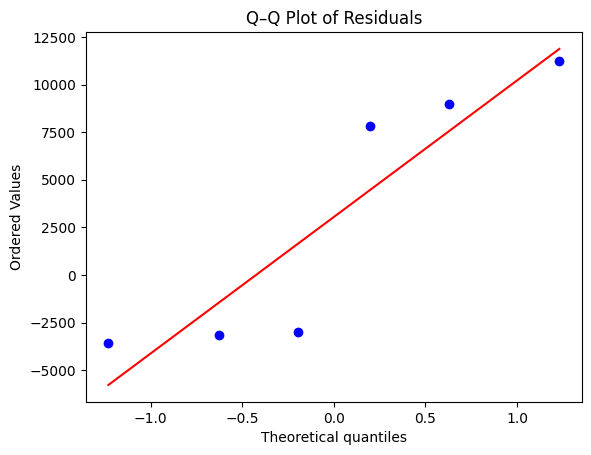

In [361]:
import scipy.stats as stats
import pylab

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.title("Q–Q Plot of Residuals")
pylab.show()

Key Points I found :
    The dataset is small in size so the LinearRegression model had less data to train on.
    We were only given a single column , which means if there is any irregularities found or we need more variables we cant (Cause we dont have more).
    The Salary displot found to be skewed and missing bins in middle which int the end introduced bias.
    Despite all this strong R**2 valuen indicating variance and prediction accuracy.
    Resdiuals were also seemed to be not in bell shaped (culprit : salary skew).
    For a small dataset we can say it is good enough we need more data or check for polynomial regression if it better fits this

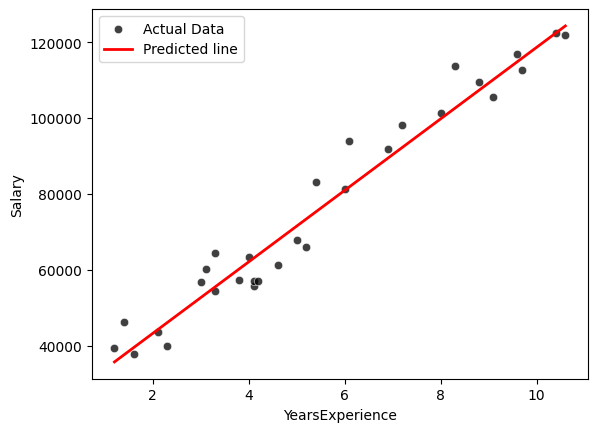

In [362]:
sns.scatterplot(
                    x = df['YearsExperience'],
                    y = df['Salary'],
                    data = df,
                    color = 'black',
                    alpha = 0.75,
                    label = 'Actual Data'
)
plt.plot(
            df['YearsExperience'],
            y_predicted_all,
            linewidth = 2,
            label = 'Predicted line',
            color='red'
)
plt.legend()
plt.show()